<a href="https://colab.research.google.com/github/nishanshrestha04/DSA_NOTES/blob/main/Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Structures and Algorithms W5 Lab
Graphs have an incredible flexibility allowing for the application to a diverse range of challenging real world problems. This notebook will look at 3 specific Graph Problems.

#Your name : Nishan Shrestha
#ID 24128429

In [ ]:
#Implement Heap

## Minimum Spanning Tree Problem
Firstly, the MST is coded to identify the lowest overall graph weight that connects all edges.

In [ ]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree

In [ ]:
# %time
X = csr_matrix([[0, 8, 0, 3],
                [0, 0, 2, 5],
                [0, 0, 0, 6],
                [0, 0, 0, 0]])

Tcsr = minimum_spanning_tree(X)
Tcsr.toarray().astype(int)

array([[0, 0, 0, 3],
       [0, 0, 2, 5],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

Based on the graph contained in the slides, solve find the MST and then draw the graph.

In [ ]:
# Find the indices of non-zero elements in Tcsr
indices = Tcsr.nonzero()
print(indices)
# Print the minimum spanning tree in a readable format
for i, j in zip(indices[0], indices[1]):
    print(f"({i}, {j}) - weight: {Tcsr[i, j]}")


(array([0, 1, 1], dtype=int32), array([3, 2, 3], dtype=int32))
(0, 3) - weight: 3.0
(1, 2) - weight: 2.0
(1, 3) - weight: 5.0


In [ ]:
#Another IDEA
# Iterate over each edge and its weight in the minimum spanning tree
for k in range(len(indices[0])):
    i, j = indices[0][k], indices[1][k]
    weight = Tcsr[i, j]
    print(f"({i}, {j}) - weight: {weight}")

(0, 3) - weight: 3.0
(1, 2) - weight: 2.0
(1, 3) - weight: 5.0


Based on the graph contained in the slides, solve find the MST and then draw the graph.

In [ ]:
#Your code here

## Travelling Salesman Problem
This problem focusses on identifying an optimal low-cost route that visits all available edges. The example below focusses on a set of randomly generated cities with [x,y] co-ordinates acting as a proxy for longitude and latitude measurements.

Initial Guess:



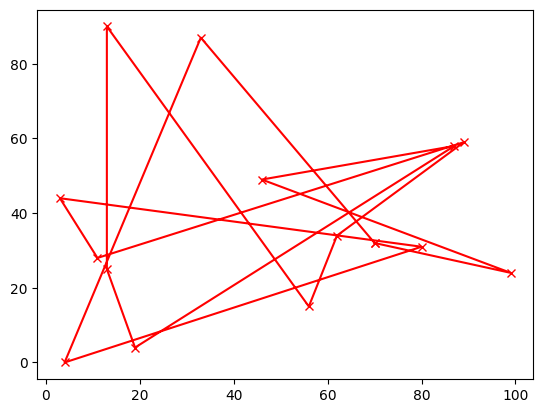


Final Path:



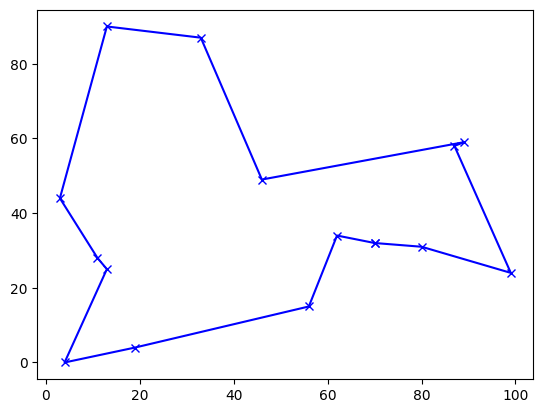

In [ ]:
# Doing our imports
import random, numpy, math, copy, matplotlib.pyplot as plt
# Randomly create some cities (these could be specified in a list of 2-d lists like a 2-d array)
#cities = [random.sample(range(100), 2) for x in range(15)];
# Fix cities to be a set list:
cities = [[56, 15], [62, 34], [46, 49], [89, 59], [3, 44], [13, 25], [13, 90], [33, 87], [87, 58], [99, 24], [19, 4], [11, 28], [4, 0], [70, 32], [80, 31]]
tour = random.sample(range(15),15);
print('Initial Guess:\n')
plt.plot([cities[tour[i % 15]][0] for i in range(16)], [cities[tour[i % 15]][1] for i in range(16)], 'xr-');
plt.show()

for temperature in numpy.logspace(0,5,num=100000)[::-1]:
  [i,j] = sorted(random.sample(range(15),2));
  newTour =  tour[:i] + tour[j:j+1] +  tour[i+1:j] + tour[i:i+1] + tour[j+1:];
  if math.exp( ( sum([ math.sqrt(sum([(cities[tour[(k+1) % 15]][d] - cities[tour[k % 15]][d])**2 for d in [0,1] ])) for k in [j,j-1,i,i-1]]) - sum([math.sqrt(sum([(cities[newTour[(k+1) % 15]][d] - cities[newTour[k % 15]][d])**2 for d in [0,1] ])) for k in [j,j-1,i,i-1]])) / temperature) > random.random():
    tour = copy.copy(newTour);
print('\nFinal Path:\n')
plt.plot([cities[tour[i % 15]][0] for i in range(16)], [cities[tour[i % 15]][1] for i in range(16)], 'xb-');
plt.show()

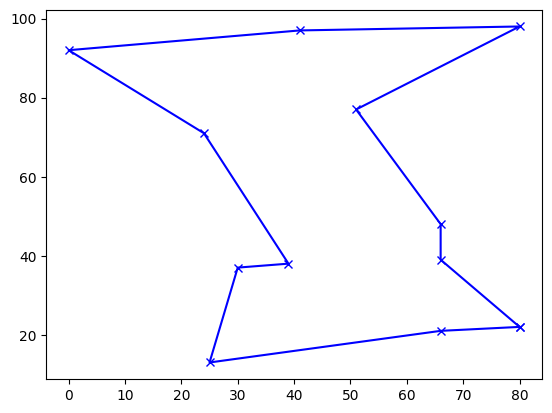

In [ ]:
# TSP Solution
import random, numpy, math, copy, matplotlib.pyplot as plt
cities = [[0, 92],
 [66, 39],
 [24, 71],
 [66, 21],
 [39, 38],
 [30, 37],
 [66, 48],
 [51, 77],
 [80, 22],
 [80, 98],
 [41, 97],
 [25, 13]]

tour = random.sample(range(12),12);
for temperature in numpy.logspace(0,5,num=100000)[::-1]:
    [i,j] = sorted(random.sample(range(12),2));
    newTour =  tour[:i] + tour[j:j+1] +  tour[i+1:j] + tour[i:i+1] + tour[j+1:];
    oldDistances =  sum([ math.sqrt(sum([(cities[tour[(k+1) % 12]][d] - cities[tour[k % 12]][d])**2 for d in [0,1] ])) for k in [j,j-1,i,i-1]])
    newDistances =  sum([ math.sqrt(sum([(cities[newTour[(k+1) % 12]][d] - cities[newTour[k % 12]][d])**2 for d in [0,1] ])) for k in [j,j-1,i,i-1]])
    if math.exp( ( oldDistances - newDistances) / temperature) > random.random():
        tour = copy.copy(newTour);
plt.plot([cities[tour[i % 12]][0] for i in range(13)], [cities[tour[i % 12]][1] for i in range(13)], 'xb-');
plt.show()

## Shortest Path Problem
The final problem utilises Dijkstra's algorithm to find the shortest path, or set of vertices, connecting two edges.

In [ ]:
# Import native graph libraries for shortest path calculation
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import dijkstra
import numpy

# Create the undirected weighted graph
labels = ['A','B','C','D']
graph = [
    [0, 1, 2, 0],
    [1, 0, 0, 1],
    [2, 0, 0, 3],
    [0, 1, 3, 0]
    ]

# Convert to sparse matrix for the following calculations
graph = numpy.matrix(graph)
# Print edges and weights
print(graph)

# Use Dijkstra's algorithm to calculate the shortest distances between all nodes and node 0
dist_matrix, predecessors = dijkstra(csgraph=graph, directed=False, indices=0, return_predecessors=True)
# Print the list of shortest distances from node 0 to all other nodes
#print(dist_matrix)
# Print the list of predecessors from which the shortest path from node 0 to any node is identified
#print(predecessors)

predecessors[0] = len(predecessors)-1
path = set(predecessors)

for i in path:
    print(labels[i])

[[0 1 2 0]
 [1 0 0 1]
 [2 0 0 3]
 [0 1 3 0]]
A
B
D


Now try and check our calculations from the slides based on the larger A-H graph.

In [ ]:
# Put your code here

In [ ]:
# Import native graph libraries for shortest path calculation
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import dijkstra
import numpy

# Create the undirected weighted graph
labels = ['A','B','C','D','E','F','G','H','I','J']
graph = numpy.zeros([len(labels),len(labels)])
graph[0,1]=4
graph[0,2]=5
graph[0,3]=8
graph[1,3]=3
graph[1,4]=12
graph[2,3]=1
graph[2,5]=11
graph[3,4]=9
graph[3,5]=4
graph[3,6]=10
graph[4,6]=6
graph[4,7]=10
graph[5,6]=5
graph[5,8]=11
graph[6,7]=3
graph[6,9]=15
graph[6,8]=5
graph[7,9]=14
graph[8,9]=8


# Convert to sparse matrix for the following calculations
graph = numpy.matrix(graph)
graph = graph + graph.T
# Print edges and weights
print(graph)

# Use Dijkstra's algorithm to calculate the shortest distances between all nodes and node 0
dist_matrix, predecessors = dijkstra(csgraph=graph, directed=False, indices=0, return_predecessors=True)
# Print the list of shortest distances from node 0 to all other nodes
#print(dist_matrix)
# Print the list of predecessors from which the shortest path from node 0 to any node is identified
#print(predecessors)

predecessors[0] = len(predecessors)-1
path = set(predecessors)

for i in path:
    print(labels[i])

##**<b>Lab session-5 <b>**



<i>Creating Node class<i>

In [ ]:
class Node:
    def __init__(self, value):
        self.value = value
        self.neighbours = []

    def add_neighbour(self, node):
        self.neighbours.append(node)

*Exercise 2 (i)*


In [ ]:
n1 = Node('A')
n2 = Node('B')
n3 = Node('C')
n4 = Node('D')

*Exercise 2 (iv)*

Using the method to add neighbor to the graph using the adjacency list


In [ ]:
adj_list = {
    'A': ['B', 'C'],
    'B': ['C'],
    'C': ['D'],
    'D': ['A', 'B']
}

nodes = {i: Node(i) for i in adj_list}

for node, neighbours in adj_list.items():
    for neighbour in neighbours:
        nodes[node].add_neighbour(nodes[neighbour])

#**Lab submission Exercise**
##*Exercise(3)*

Considering the given code and graphs from pdf

```
class Node:
    def __init__(self, value):
        self.value = value
        self.neighbours = []
def add_neighbour(self, node):
    self.neighbours.append(node)
```



In [ ]:
class Node:
    def __init__(self, value):
        self.value = value
        self.neighbours = []

def add_neighbour(self, node):
    self.neighbours.append(node)

##*Exercise(3), 'i'*

In [ ]:
#A adjacency list from the graph given
adj_list = {
    0 : [1,2],
    1 : [0,2,3],
    2 : [0,1,4],
    3 : [1,4],
    4 : [2,3]
}

# Dictionary to store node objects
nodes = {i: Node(str(i)) for i in adj_list}

#Function to add a vertex
def addVertex(self, value):
    if value not in nodes:
        nodes[value] = Node(value)

# Function to add an edge
def addEdge(self, node1, node2):
    if node1 not in nodes:
        addVertex(node1)

    elif node2 not in nodes:
        addVertex(node2)
    3
    nodes[node1].add_neighbour(nodes[node2])
    nodes[node2].add_neighbour(nodes[node1])

#*Exercise(4), '1'*

##BFS TRAVERSAL IN GRAPH:

In [ ]:
graph = {
    1: [2,3,4],
    2: [1,3,4],
    3: [1,2,4,5],
    4: [2,1,3,5],
    5: [3,4]
}

In [ ]:
# Defining a class named Queue
class Queue:
    def __init__(self):
        self.items = []

    # method to add item
    def enqueue(self, item):
        self.items.append(item)
    # method to remove item
    def dequeue(self):
        return self.items.pop(0)
    # method to check the status of the queue
    def is_empty(self):
        return len(self.items) == 0

# initialize BFS traversal
def bfs(graph, start):
    visited = set()
    queue = Queue()
    queue.enqueue(start)
    traversal = []
    # using bfs until the queue is empty
    while not queue.is_empty():
        node = queue.dequeue()
        if node not in visited:
            traversal.append(node)
            visited.add(node)
            for neighbor in graph[node]:
                if neighbor not in visited:
                    queue.enqueue(neighbor)
    # print the path
    for i in range(len(traversal)):
        if i < len(traversal) - 1:
            print(traversal[i], ' -> ' , end='')
        else:
            print(traversal[i], end='')
bfs(graph, 1)

1  -> 2  -> 3  -> 4  -> 5

##DFS TRAVERSAL IN GRAPH:

In [ ]:
# initialize DFS traversal
def dfs(graph, start):
    visited = set()
    stack = [start]
    traversal = []
    # using dfs until the queue is empty
    while stack:
        node = stack.pop()
        if node not in visited:
            traversal.append(node)
            visited.add(node)
            # add the unvisited meighbors onto the stack
            for neighbor in reversed(graph[node]):
                if neighbor not in visited:
                    stack.append(neighbor)

    return traversal

print(dfs(graph, 2))

[2, 0, 1, 3]
